# **라이브러리 다운로드**

In [3]:
#!pip install astroNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.3 MB 4.1 MB/s 
     |████████████████████████████████| 4.5 MB 42.5 MB/s 
     |████████████████████████████████| 832 kB 55.1 MB/s 
     |████████████████████████████████| 48 kB 5.4 MB/s 
     |████████████████████████████████| 4.0 MB 51.5 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284595 sha256=40e35233d6cf8787e06106c0483fc637b7122905300118c9eb8edbec4324085b
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
Successfully built astroNN


In [4]:
#!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 5.3 MB/s 


# **코드**

In [5]:
from astroNN.datasets import load_galaxy10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
images, labels = load_galaxy10()

Galaxy10.h5:  99%|█████████▉| 208M/210M [00:03<00:00, 94.0MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:04, 43.2MB/s]                           


In [9]:

labels = labels.astype(np.float32)
labels = tf.keras.utils.to_categorical(labels, 10)
images = images.astype(np.float32)
images = images/255

In [13]:
print(images.shape, labels.shape)

(21785, 69, 69, 3) (21785, 10)


In [ ]:
#from tensorflow.keras import utils

#labels = utils.to_categorical(labels, 10)

In [14]:
labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [15]:
labels.shape

(21785, 10)

In [16]:
pd_labels = pd.DataFrame(labels)

In [17]:
pd_labels

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21781,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21782,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
labels[0]
condition = (labels[0] == 1.0)
labels


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [63]:
def sample_index(label_num):
  pd_labels[label_num]
  condition = (pd_labels[label_num] == 1.0)
  result = pd_labels[condition][label_num].iloc[0:1].index.tolist()
  return result
for i in range (10):
    sample_index(i)
print(sample_index)

<function sample_index at 0x7feceeb10290>


In [72]:
print(sample_index(0),
sample_index(1),
sample_index(2),
sample_index(3),
sample_index(4),
sample_index(5),
sample_index(6),
sample_index(7),
sample_index(8),
sample_index(9))

[28] [5] [0] [11] [2] [225] [40] [9] [15] [17]


In [73]:
sam_index_list = [28,5,0,11,2,225,40,9,15,17]

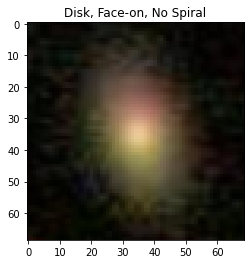

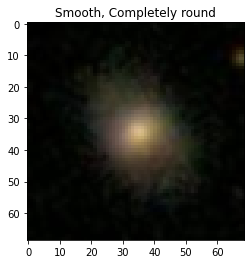

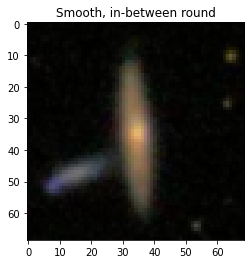

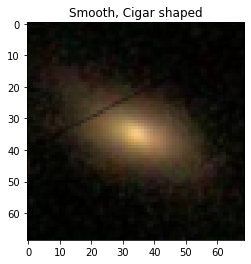

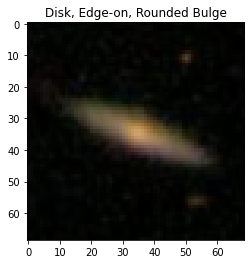

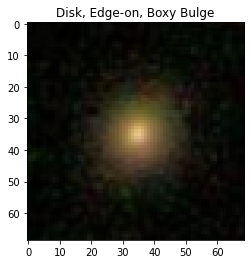

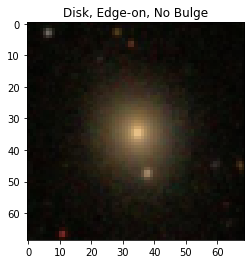

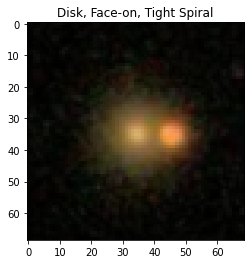

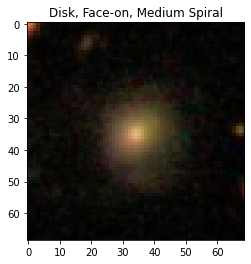

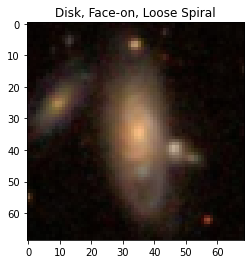

In [87]:
def show_image(image_data,label):
    label = galaxy10cls_lookup(int(label))
    plt.imshow(image_data)
    plt.title(label)
    plt.show()

for i in range (10):
  show_image(images[i], i)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.15)

In [89]:
print(X_train.shape, y_train.shape)

(18517, 69, 69, 3) (18517, 10)


In [90]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',
input_shape=(69,69,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 67, 67, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 65, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8388736   
                                                        

In [91]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
print(X_train.shape, y_train.shape)

(18517, 69, 69, 3) (18517, 10)


In [93]:
history = model.fit(X_train, y_train, epochs=20, 
validation_data=(X_test, y_test))

model.evaluate(X_test, y_test, verbose=2)

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.',c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.',c='blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/20
 67/579 [==>...........................] - ETA: 4:34 - loss: 1.7656 - accuracy: 0.3083

KeyboardInterrupt: ignored